In [11]:
# Spam Detection Using Bayesian Probability
# ========================================

# 1. Imports & Setup
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import nltk
import os
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dilhara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Load Dataset (SMS Spam Collection)

base_dir = os.getcwd()
data_path = os.path.join(base_dir, "data", "SMSSpamCollection")
df = pd.read_csv(data_path, sep='\t', header=None, names=['label', 'message'])

# Preview
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Missing value handeling
df.isna().sum()

label      0
message    0
length     0
dtype: int64

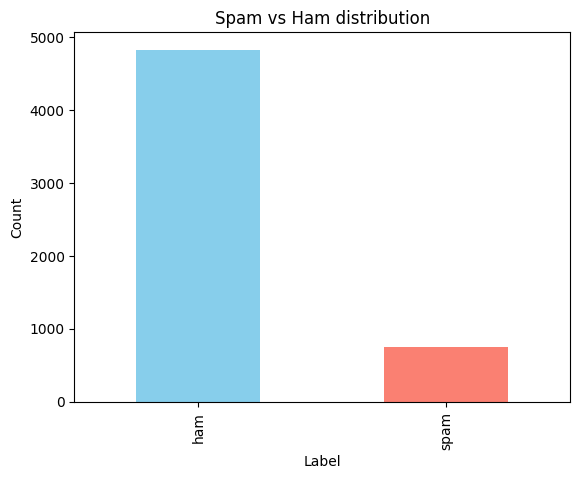

In [4]:
# Label distribution
df['label'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Spam vs Ham distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


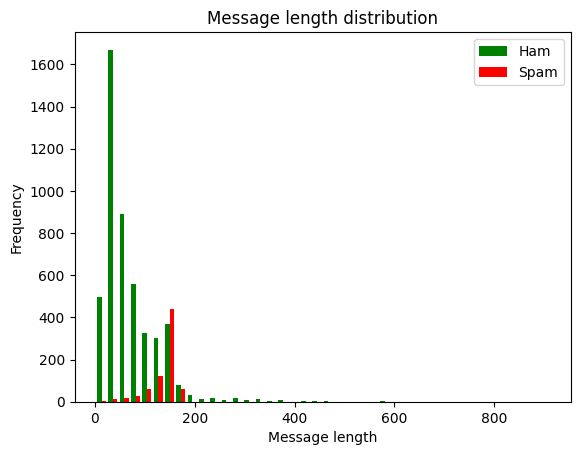

In [10]:
# 3. Basic text exploration
df['length'] = df['message'].apply(len)
plt.hist([df[df['label']=='ham']['length'], df[df['label']=='spam']['length']],
         bins=40, label=['Ham','Spam'], color=['green','red'])
plt.legend()
plt.title("Message length distribution")
plt.xlabel("Message length")
plt.ylabel("Frequency")
plt.show()